# MILESTONE 2

## Part 1: Project Overview

__Objective:__
* The project aims to detect individuals who are at risk of heart disease. By identifying at-risk individuals early, the goal is to make them aware of their risk factors and encourage actions to improve their long-term health.
* This project focuses on utilizing logistic regression to predict heart disease risk based on various lifestyle, health, and demographic factors.
* The data is analyzed to understand the impact of these factors on the likelihood of having a heart attack, aiming to provide actionable insights for health improvement.

__Methodology__
* Method of Analysis: The project employs supervised learning, specifically logistic regression, to analyze the data and predict heart disease risk.

__Variables__
* Dependent Variable:

HadHeartAttack: Indicates whether the patient has had a heart attack.<br>
* Independent Variables:

RaceEthnicityCategory: Patient’s ethnicity. <br>
Sex: Patient's gender (male or female). <br>
AgeCategory: Patient’s age range. <br>
BMI: Body Mass Index, a measure of body fat based on height and weight. <br>
GeneralHealth: Patient’s general state of health (ranging from very good to very poor).<br>
PhysicalHealthDays: Days the patient underwent physical therapy.<br>
MentalHealthDays: Days the patient underwent mental health therapy.<br>
PhysicalActivities: Indicates if the patient has engaged in physical activities.<br>
HadAngina: Indicates if the patient has been diagnosed with Angina.<br>
HadStroke: Indicates if the patient has had a stroke.<br>
HadAsthma: Indicates if the patient has been diagnosed with Asthma.<br>
HadCOPD: Indicates if the patient has been diagnosed with COPD (Chronic Obstructive Pulmonary Disease).<br>
HadDepressiveDisorder: Indicates if the patient has been diagnosed with a depressive disorder.<br>
HadKidneyDisease: Indicates if the patient has been diagnosed with kidney disease.<br>
HadDiabetes: Indicates if the patient has been diagnosed with diabetes.<br>
DifficultyWalking: Indicates if the patient has had difficulty walking.<br>
DifficultyDressingBathing: Indicates if the patient has had difficulty dressing and bathing.<br>
SmokerStatus: Indicates if the patient is a smoker.<br>
ECigaretteUsage: Indicates if the patient uses e-cigarettes.<br>
AlcoholDrinkers: Indicates if the patient drinks alcohol.<br>
HighRiskLastYear: Indicates if the patient has been at high risk of heart disease in the last year.<br>
CovidPos: Indicates if the patient has tested positive for COVID-19.<br>
SleepHours: Hours the patient sleeps.<br>
HeightInMeters: Patient’s height in meters.<br>
WeightInKilograms: Patient’s weight in kilograms.<br>

## Part 2: Data Cleaning

In [1]:
# importing necessary models
import matplotlib.pyplot as plt
import pyspark.pandas as ps
ps.set_option('plotting.backend','matplotlib')
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql.functions import col
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import PCA
from pyspark.sql import functions as F
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.feature import UnivariateFeatureSelector
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.stat import Correlation


VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1715370670520_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt1/yarn/usercache/livy/appcache/application_1715370670520_0001/container_1715370670520_0001_01_000001/pyspark.zip/pyspark/pandas/__init__.py:51: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.

In [2]:
# Loading the data
dirty_data = ps.read_csv('s3://tainguyen0225/Project Heart disease/heart_2022_no_nans.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
# Exam the data by showing first 10 rows
dirty_data.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays PhysicalActivities  SleepHours HadHeartAttack HadAngina HadStroke HadAsthma HadCOPD HadDepressiveDisorder HadKidneyDisease HadDiabetes DifficultyWalking DifficultyDressingBathing   SmokerStatus                            ECigaretteUsage     RaceEthnicityCategory      AgeCategory    BMI AlcoholDrinkers HighRiskLastYear CovidPos
0  Female     Very good                   4                 0                Yes           9             No        No        No        No      No                    No               No          No                No                        No  Former smoker  Never used e-cigarettes in my entire life  White only, Non-Hispanic     Age 65 to 69  27.99              No               No       No
1    Male     Very good                   0                 0                Yes           6             No        No        No        No      No                    No               No         Yes                No    

Here is the list of 10 first values of the dataframe

In [4]:
# examinate the columns with the list of columns in the dataframe
dirty_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadDiabetes', 'DifficultyWalking',
       'DifficultyDressingBathing', 'SmokerStatus', 'ECigaretteUsage',
       'RaceEthnicityCategory', 'AgeCategory', 'BMI', 'AlcoholDrinkers',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

There are total of 24 columns in the dataframe

### Handling duplicate

In [5]:
#compare the data values and distinct values
print(dirty_data.shape[0], dirty_data.to_spark().distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

246022 242632

The total of rows are 246022, However, the unique value of rows are 242632. Thefore, we have 3390 duplicate value

In [6]:
# In this step, we remove the duplicate
full_removed = dirty_data.drop_duplicates()
full_removed.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(242632, 24)

The outcome remain 242632 unique rows with 24 columns

### Handling Missing values

In [7]:
# exmaine if there are any rows with missing values
x = full_removed.isna().sum(axis=1)
# this will sum all the values of na in each ro
#since axis = 1 mean we use columns as standard ( not axis = 0)
x[x >=1].shape[0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0

There are none of the row with missing values

## Part 3 Dataset Statistic

In [8]:
#show the data statistic on numerical values
full_removed.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       PhysicalHealthDays  MentalHealthDays     SleepHours            BMI
count       242632.000000     242632.000000  242632.000000  242632.000000
mean             4.176065          4.224793       7.016824      28.703997
std              8.449724          8.144142       1.448034       6.541477
min              0.000000          0.000000       1.000000      12.020000
25%              0.000000          0.000000       6.000000      24.270000
50%              0.000000          0.000000       7.000000      27.460000
75%              3.000000          4.000000       8.000000      31.930000
max             30.000000         30.000000      24.000000      97.650000

* Total Count (All Columns)
242,632 entries, indicating the total number of valid entries for each variable.
* Mean (Average)
PhysicalHealthDays: Average of 4.17 days, indicating that on average, individuals are physically active around 4 days.<br>
MentalHealthDays: Average of 4 days, suggesting individuals take around 4 days for mental health.<br>
SleepHours: Average of 7 hours, indicating that individuals get around 7 hours of sleep.<br>
BMI: Average of 28.7, suggesting the average body mass index of the individuals.<br>
* Standard Deviation (Std)
PhysicalHealthDays: Std of 8.4, showing a wide range of physical activity days.<br>
MentalHealthDays: Std of 8.1, indicating a broad range of mental health days taken.<br>
SleepHours: Std of 1.4, showing relatively less variation in sleep hours.<br>
BMI: Std of 6.5, indicating a considerable dispersion in body mass index values.<br>
* Minimum (Min)
PhysicalHealthDays: Minimum of 0 days, indicating no physical activity days for some.<br>
MentalHealthDays: Minimum of 0 days, indicating no mental health days for some.<br>
SleepHours: Minimum of 1 hour, indicating a minimum of 1 hour of sleep for some.<br>
BMI: Minimum of 12.02, indicating the lowest BMI recorded.<br>
* 25th Percentile (1st Quartile)
PhysicalHealthDays & MentalHealthDays: None fall within 0 days active or spent on mental health, which might be misinterpreted.<br> Usually, the 25th percentile indicates the value below which 25% of the observations fall.<br>
SleepHours: 1 hour falls within the 25th percentile for sleep hours, which seems inconsistent with typical sleep data. Likely, this value represents a lower bound of the more typical sleep duration.<br>
BMI: 24.27, indicating 25% of individuals have a BMI below this value.<br>
* 50th Percentile (Median)
PhysicalHealthDays & MentalHealthDays: Median values suggest a central trend but are not specified here. The median typically divides the data into two halves.<br>
SleepHours: Median at 6 hours, indicating half of the individuals get 6 hours of sleep or less.<br>
BMI: Median at 27.46, indicating half of the individuals have a BMI of 27.46 or lower.<br>
* 75th Percentile (3rd Quartile)
PhysicalHealthDays: 75% have at least 3 days of physical activity.<br>
MentalHealthDays: 75% have at least 4 days dedicated to mental health.<br>
SleepHours: 75% get 8 hours of sleep or less.<br>
BMI: 31.89, indicating 75% of individuals have a BMI below this value.<br>
* Maximum (Max)
PhysicalHealthDays: Maximum of 30 days, indicating the highest level of physical activity recorded in a month.<br>
MentalHealthDays: Maximum of 30 days, indicating the most mental health days taken in a month.<br>
SleepHours: Maximum of 24 hours, indicating the highest amount of sleep recorded.<br>
BMI: Maximum of 97.65, indicating the highest BMI recorded.<br>

In [9]:
# show all the categorical columns
categorical_columns = full_removed.select_dtypes(include=['object']).columns
categorical_columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadDiabetes',
       'DifficultyWalking', 'DifficultyDressingBathing', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

There are total of 20 categorical columns

In [10]:
# statistic for categorical columns including count for each values, the percentage it takes, and data type.
for column in categorical_columns:
    print(f"Descriptive statistics for {column}:")
    print(full_removed[column].value_counts())
    print(full_removed[column].value_counts(normalize=True) * 100)
    print("\n")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Descriptive statistics for Sex:
Female    126231
Male      116401
Name: Sex, dtype: int64
Female    52.025701
Male      47.974299
Name: Sex, dtype: float64


Descriptive statistics for GeneralHealth:
Very good    85049
Good         77140
Excellent    40359
Fair         30654
Poor          9430
Name: GeneralHealth, dtype: int64
Very good    35.052672
Good         31.793003
Excellent    16.633832
Fair         12.633948
Poor          3.886544
Name: GeneralHealth, dtype: float64


Descriptive statistics for PhysicalActivities:
Yes    187985
No      54647
Name: PhysicalActivities, dtype: int64
Yes    77.477414
No     22.522586
Name: PhysicalActivities, dtype: float64


Descriptive statistics for HadHeartAttack:
No     229202
Yes     13430
Name: HadHeartAttack, dtype: int64
No     94.464869
Yes     5.535131
Name: HadHeartAttack, dtype: float64


Descriptive statistics for HadAngina:
No     227682
Yes     14950
Name: HadAngina, dtype: int64
No     93.838405
Yes     6.161595
Name: HadAngina, d

__Here's an interpretation of each categorical variable:__

* Sex
52.03% of the population is Female, and 47.97% is Male. This shows a slightly higher representation of females in the dataset.
* General Health
A majority of individuals rate their health as either Very good (35.05%) or Good (31.79%), indicating a positive perception of health among over two-thirds of the respondents. Those considering their health as Excellent, Fair, or Poor represent smaller fractions, with Poor health being the least common at 3.89%.
* Physical Activities
77.48% of respondents engage in physical activities, suggesting a relatively active lifestyle, while 22.52% do not.
* Heart Health
The prevalence of heart-related health conditions is relatively low, with 94.46% having no history of heart attack and 93.84% not experiencing angina. Stroke prevalence is also low, with 95.83% reporting no history of stroke.
* Chronic Conditions
Asthma and COPD (Chronic Obstructive Pulmonary Disease) are reported at 15.04% and 7.83%, respectively, indicating these are less common but significant health issues.
Depressive disorders are reported by 20.86%, highlighting mental health concerns in the population.
Kidney disease and diabetes are relatively uncommon, with the majority not affected. Diabetes, however, has a notable presence at 13.92%, excluding gestational diabetes.
* Lifestyle Factors
Difficulty in walking and dressing/bathing is reported at 14.86% and 3.44%, respectively, indicating most individuals do not face significant physical impairments.
Smoking status varies, with 59.71% never having smoked, and current smoking habits (daily or some days) are relatively low.
E-cigarette usage is mostly non-existent or occasional among the population, with 76.98% never having used them.
* Demographics
The majority of the population is White only, Non-Hispanic (75.42%), with other ethnicities representing smaller percentages.
Age distribution is fairly spread across various age categories, with a slight concentration in the older age groups, indicating a mature population sample.
* Substance Use and Risk Behavior
Alcohol consumption is reported by 54.71%, suggesting over half of the population consumes alcohol.
High-risk behavior in the last year is very low at 4.36%, indicating a relatively low incidence of behaviors considered to be high risk.
* Covid-19 Impact
Covid-19 positivity is reported at 28.83% with an additional 3.45% having tested positive using home tests without professional confirmation, indicating the significant impact of the pandemic on the population.

## Part 4: Data Visualization

In [11]:
#this defines a function in order to plot histograms
def plot_hist(df, features, n_rows, n_cols):
    fig, ax = plt.subplots(n_rows, n_cols)
    fig.tight_layout(pad=1.5)
    for i in range(len(features)):
        df[features[i]].hist(ax=ax[i//n_cols,i%n_cols], title=features[i])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The code create a function for drawing histogram charts

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

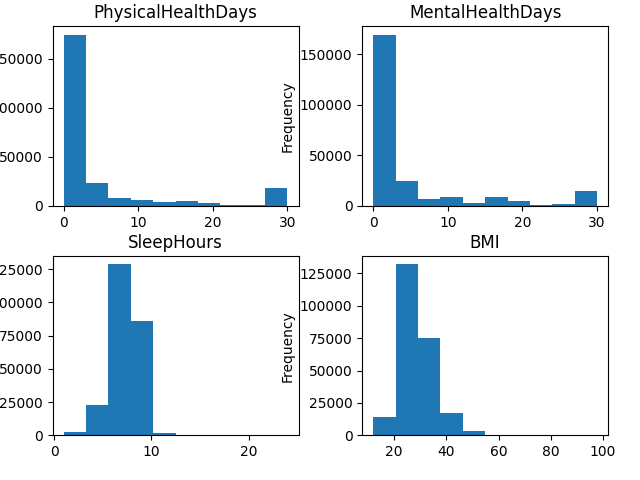

In [12]:
#creating histograms for our four numerical columns
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI']
plot_hist(df=full_removed, features=features, n_rows=2, n_cols=2)
%matplot plt

* Output:

PhysicalHealthDays: Skews towards left (0), most patients have lower amounts of physical health days

MentalHealthDays: Skews left towards 0, most patients have low amounts of mental health days

SleepHours: Majority is between 5-10 hours of sleep, no is is above ~12 hours

BMI: All data is between 10-50, majority is around 30


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

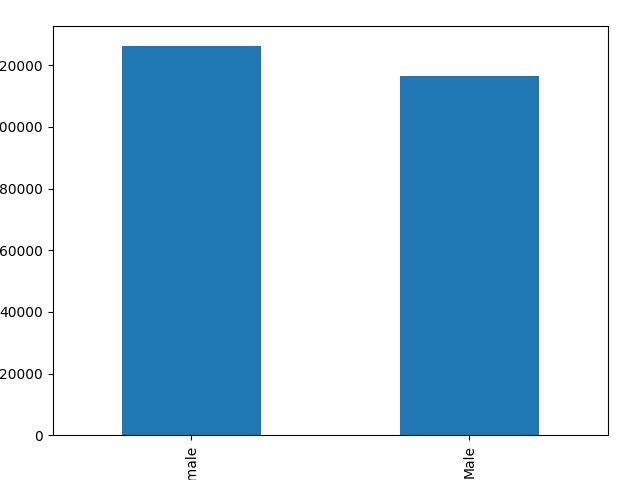

In [13]:
#creating bar chart for categorical column, Sex
plt.clf()
sex = full_removed['Sex'].value_counts().plot.bar()
%matplot plt

* Output: Slightly higher amount of female patients than male

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

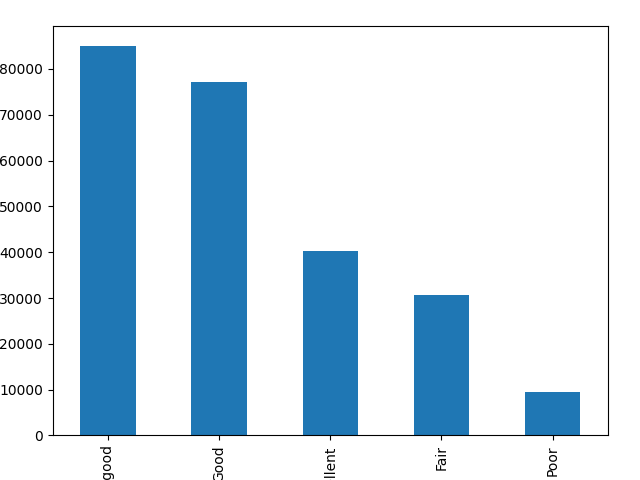

In [14]:
#creating bar chart for categorical column, GeneralHealth
plt.clf()
GeneralHealth = full_removed['GeneralHealth'].value_counts().plot.bar()
%matplot plt

* Output: Highest amount to lowest - Very good, Good, Excellent, Fair, Poor

Most patients have "very good" health

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

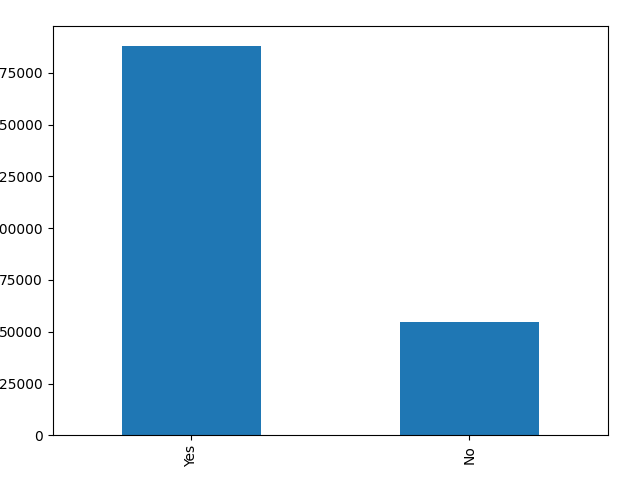

In [15]:
#creating bar chart for categorical column, PhysicalActivities
plt.clf()
PhysicalActivities = full_removed['PhysicalActivities'].value_counts().plot.bar()
%matplot plt

* Output: Majority patients answered "Yes" to being physically active

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

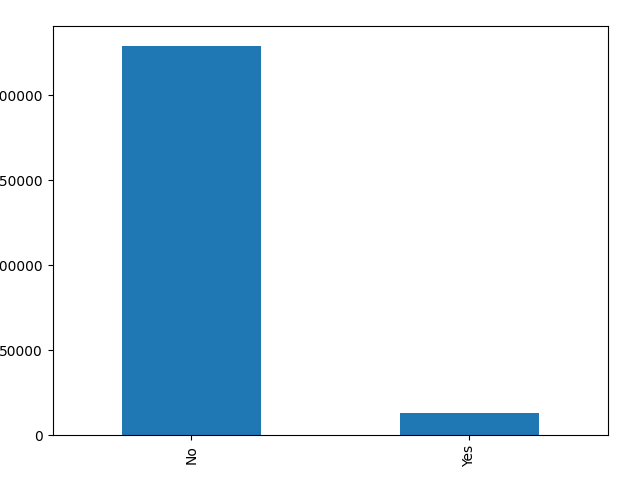

In [16]:
#creating bar chart for categorical column, HadHeartAttack
plt.clf()
HadHeartAttack = full_removed['HadHeartAttack'].value_counts().plot.bar()
%matplot plt

* Output: Very low amout of patients answered "No," meaning majority patients have not had a heart attack

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

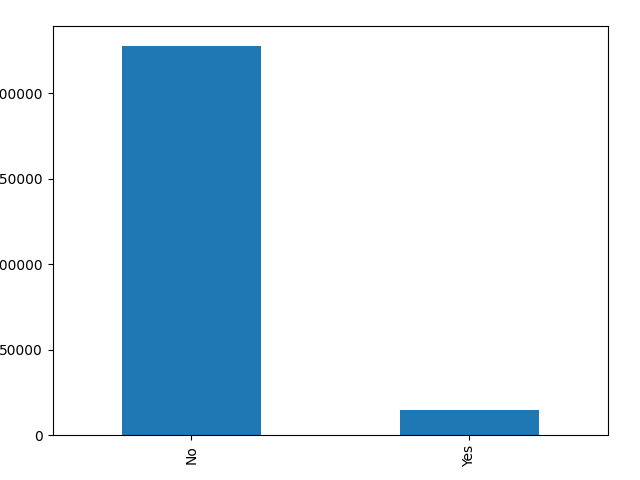

In [17]:
#creating bar chart for categorical column, HadAngina
plt.clf()
HadAngina = full_removed['HadAngina'].value_counts().plot.bar()
%matplot plt

* Output: Majority patients answered "No" to having angina

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

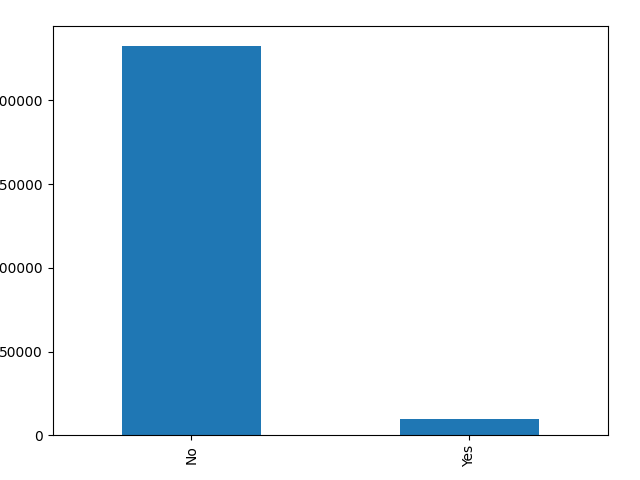

In [18]:
#creating bar chart for categorical column, HadStroke
plt.clf()
HadStroke = full_removed['HadStroke'].value_counts().plot.bar()
%matplot plt

* Output: Very low amount of patients answered "Yes," meaning most patients did not have a stroke

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

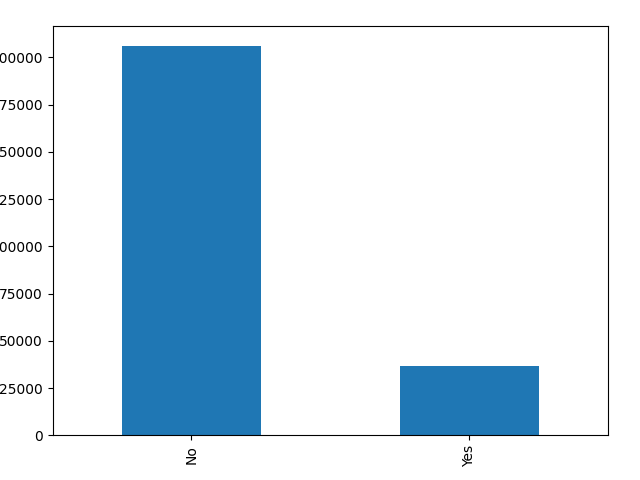

In [19]:
#creating bar chart for categorical column, HadAsthma
plt.clf()
HadAsthma = full_removed['HadAsthma'].value_counts().plot.bar()
%matplot plt

* Output: Majority patients answered "No," meaning most patients do not have asthma

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

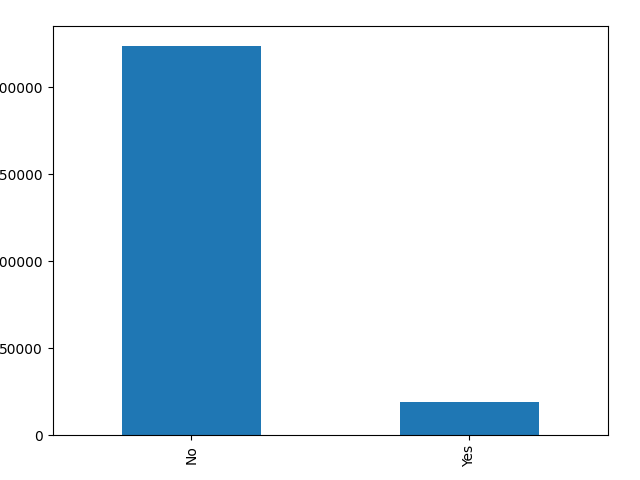

In [20]:
#creating bar chart for categorical column, HadCOPD
plt.clf()
HadCOPD = full_removed['HadCOPD'].value_counts().plot.bar()
%matplot plt

* Output: Majority patients answered "No" meaning most patients did not have COPD

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

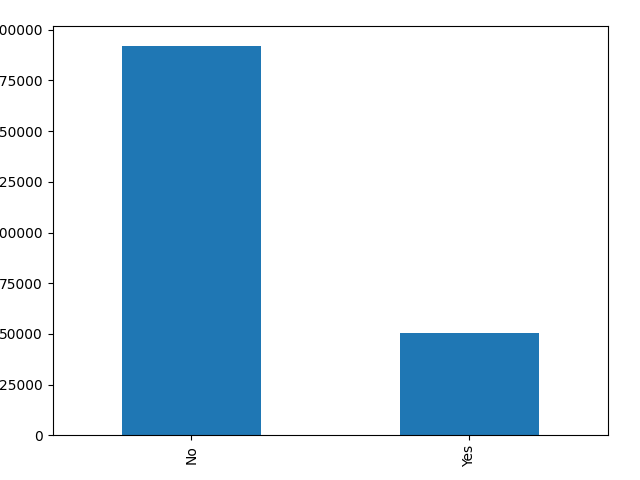

In [21]:
#creating bar chart for categorical column, HadDepressiveDisorder
plt.clf()
HadDepressiveDisorder = full_removed['HadDepressiveDisorder'].value_counts().plot.bar()
%matplot plt

* Output: Majority patients have not had depressive disorder, about 50,000 patients did

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

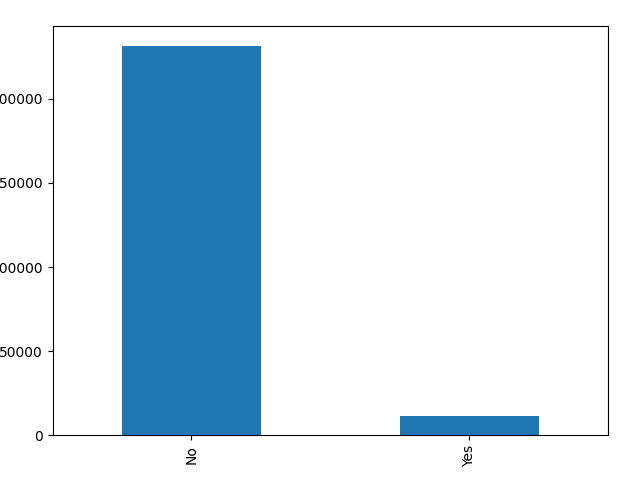

In [22]:
#creating bar chart for categorical column, HadKidneyDisease
plt.clf()
HadKidneyDisease = full_removed['HadKidneyDisease'].value_counts().plot.bar()
%matplot plt

* Output: Very low amount of patients answered "Yes" meaning majority did not have kidney disease

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

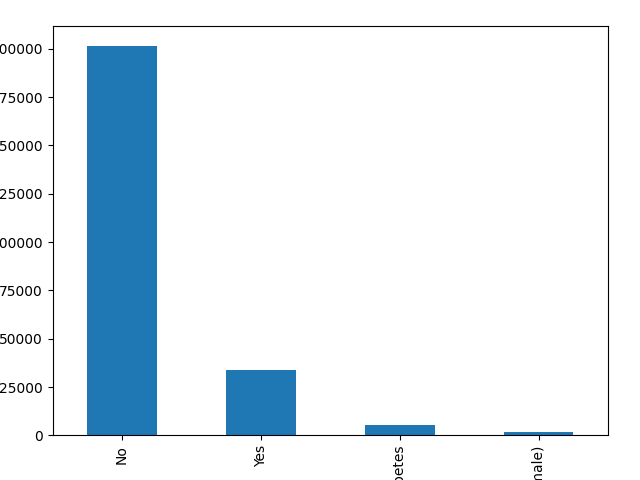

In [23]:
#creating bar chart for categorical column, HadDiabetes
plt.clf()
HadDiabetes = full_removed['HadDiabetes'].value_counts().plot.bar()
%matplot plt

* Output: Highest amount to lowest - No, Yes, No, pre-diabetes or borderline diabetes, Yes, but only during pregnancy (female)

Majority did not have diabetes


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

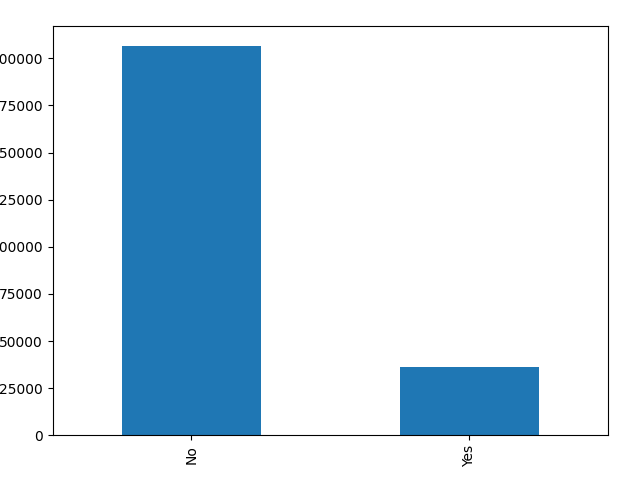

In [24]:
#creating bar chart for categorical column, DifficultyWalking
plt.clf()
DifficultyWalking = full_removed['DifficultyWalking'].value_counts().plot.bar()
%matplot plt

* Output: Majority answered "No" to having difficulty walking

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

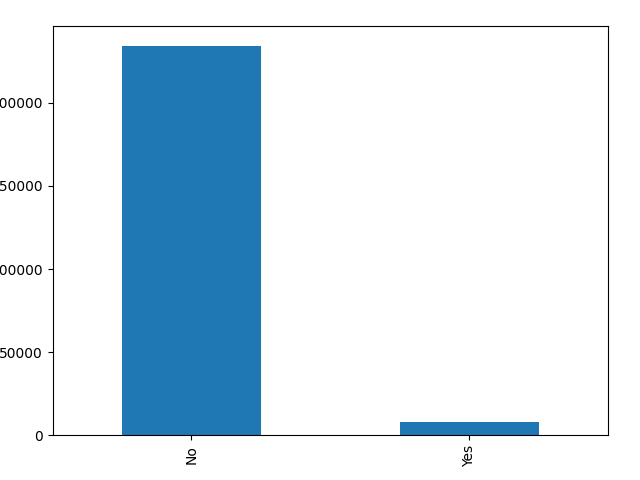

In [25]:
#creating bar chart for categorical column, DifficultyDressingBathing
plt.clf()
DifficultyDressingBathing = full_removed['DifficultyDressingBathing'].value_counts().plot.bar()
%matplot plt

* Output: Very low amount answered "Yes" meaning majority did not have difficulty dressing/bathing

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

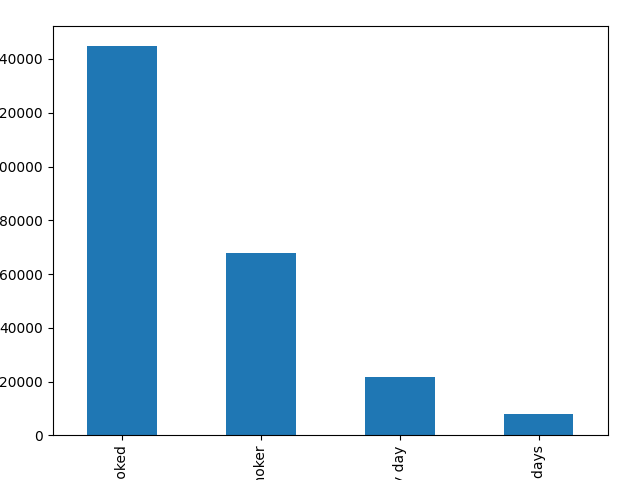

In [26]:
#creating bar chart for categorical column, SmokerStatus
plt.clf()
SmokerStatus = full_removed['SmokerStatus'].value_counts().plot.bar()
%matplot plt

* Output: Highest amount to lowest - Never smoked, Former smoker, Current smoker - now smokes every day, Current smoker - now smokes some days

Majority has never smoked

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

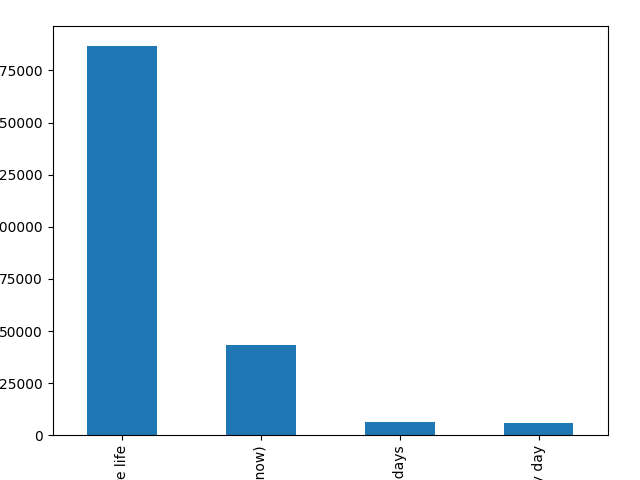

In [27]:
#creating bar chart for categorical column, ECigaretteUsage
plt.clf()
ECigaretteUsage = full_removed['ECigaretteUsage'].value_counts().plot.bar()
%matplot plt

* Output: Highest amount to lowest - Never used e-cigarettes in my entire life, Not at all (right now), Use them some days, Use them every day

Majority has never used e-cigarettes in entire life

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

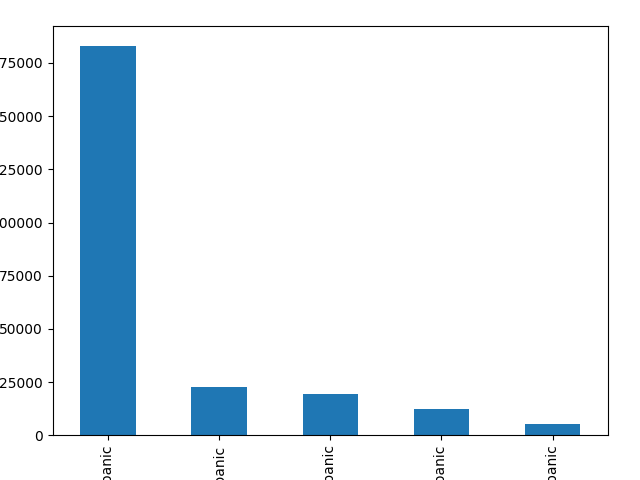

In [28]:
#creating bar chart for categorical column, RaceEthnicityCategory
plt.clf()
RaceEthnicityCategory = full_removed['RaceEthnicityCategory'].value_counts().plot.bar()
%matplot plt

* Output: Highest amount to lowest - White only, Non-Hispanic, Hispanic, Black only, Non-Hispanic, Other race only, Non-Hispanic, Multiracial, Non-Hispanic

Majority of patients are "White only, non-hispanic" and then there's a sharp drop in the amount of patients that are "Hispanic" and it graudally decreases in the list stated above.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

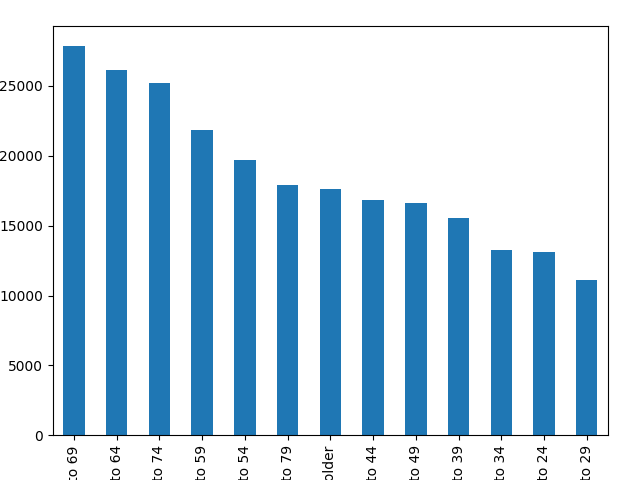

In [29]:
#creating bar chart for categorical column, AgeCategory
plt.clf()
AgeCategory = full_removed['AgeCategory'].value_counts().plot.bar()
%matplot plt

* Output: Highest amount to lowest - Age 65 to 69, Age 60 to 64, Age 70 to 74, Age 55 to 59, Age 50 to 54, Age 75 to 79, Age 80 or older, Age 40 to 44, Age 45 to 49, Age 35 to 39, Age 30 to 34, Age 18 to 24, Age 25 to 29

Output is a gradual decrease in order of highest to lowest stated above

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

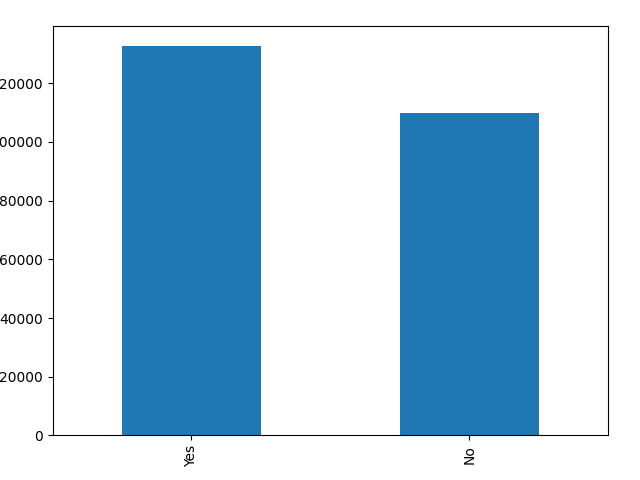

In [30]:
#creating bar chart for categorical column, AlcoholDrinkers
plt.clf()
AlcoholDrinkers = full_removed['AlcoholDrinkers'].value_counts().plot.bar()
%matplot plt

* Output: About 130,000 patients answered "Yes" to drinking alcohol and about 110,000 patients answered "No"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

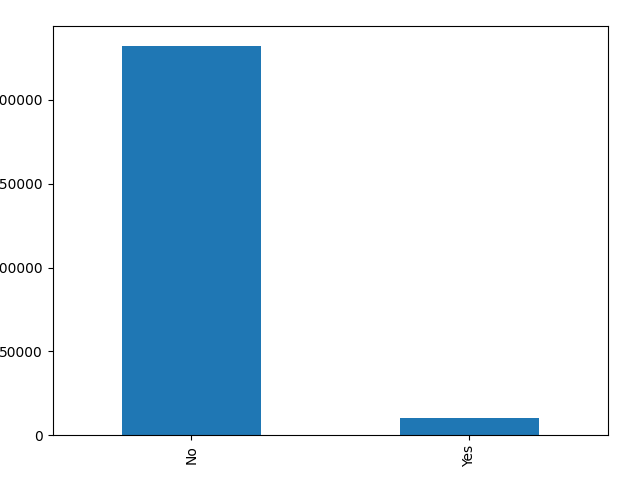

In [31]:
#creating bar chart for categorical column, HighRiskLastYear
plt.clf()
HighRiskLastYear = full_removed['HighRiskLastYear'].value_counts().plot.bar()
%matplot plt

* Output: Very high amount of patients answered "No" to being at high risk last year

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

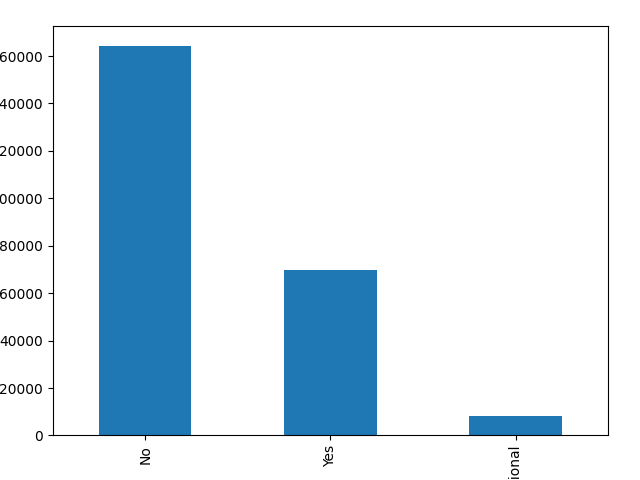

In [32]:
#creating bar chart for categorical column, CovidPos
plt.clf()
CovidPos = full_removed['CovidPos'].value_counts().plot.bar()
%matplot plt

* Output: Highest amount to lowest - No, Yes, Tested positive using home test without a health professional

Over 160,000 patients answered "No," about 70,000 patients answered "Yes," and about 10,000 patients answered "Tested positive using home test without a health professional"


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

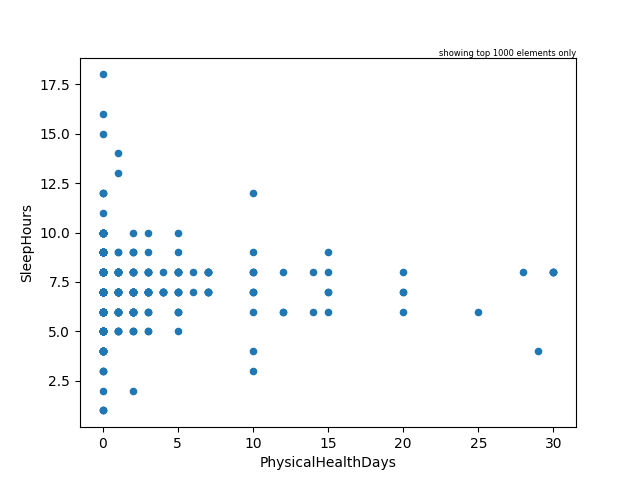

In [33]:
#creating a scatter plot to compare PhysicalHealthDays and SleepHours
plt.clf()
full_removed.plot.scatter('PhysicalHealthDays', 'SleepHours')
%matplot plt

* Output: Scatter plot is skewed left, meaning that patients that have more physical health days get about 5-10 hours of sleep

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

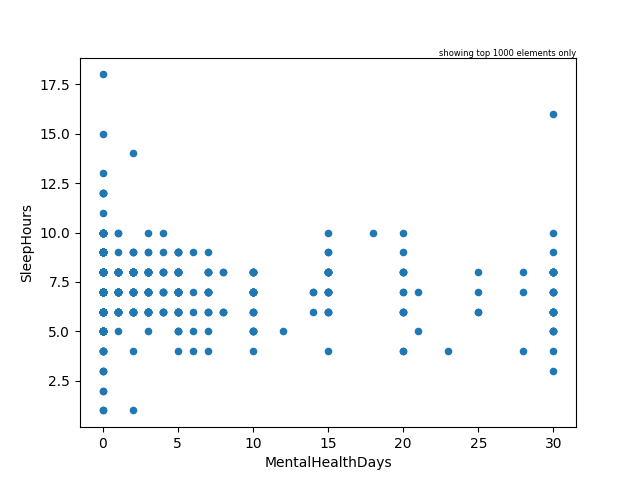

In [34]:
#creating a scatter plot to compare MentalHealthDays and SleepHours
plt.clf()
full_removed.plot.scatter('MentalHealthDays', 'SleepHours')
%matplot plt

* Output: Scatter plot is evenly distributed with few outliers, meaning that there is not too much of a correlation between mental health days and sleep hours

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

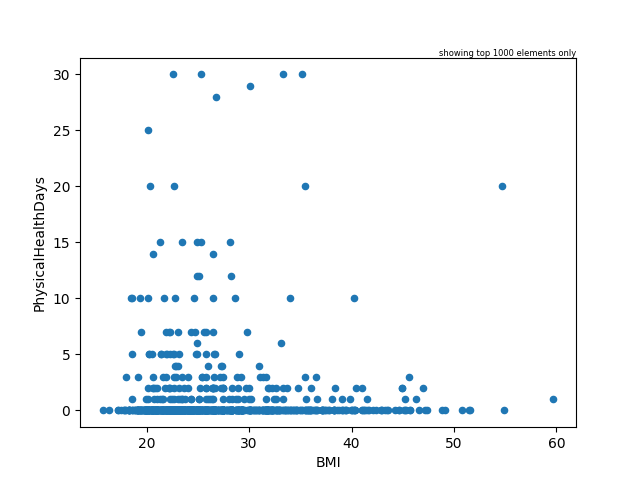

In [35]:
#creating a scatter plot to compare BMI and PhysicalHealthDays
plt.clf()
full_removed.plot.scatter('BMI', 'PhysicalHealthDays')
%matplot plt

* Output: Patients with more physical health days have a BMI between 20-40

## Part 5: Handling Outlier

__Using the Histogram Charts in the step 4__<br>
We Identify 3 main outliers in 3 variables:
* PhysicalhealthDays where the number of days > 22
The chart skewed right and the outlier locate in far right of the chart


* MentalHealthDays where the number of days > 23
The chart skewed right and the outlier locate in far right of the chart <br>
    
    
* HadDiabetes where the case of women has diebetes during pregnancy is too rare (0.8%)

    

__Finding Outlier__
* Calculate the total values of outlier

In [36]:
# find the sum of the MentalHealthDays
sum1 = (full_removed['MentalHealthDays'] > 22).sum()
sum1

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

16385

The total values of MentalHealthDays greater than 22 days are 16385

In [37]:
# find the sum of the PhysicalHealthDays
sum2 = (full_removed['PhysicalHealthDays'] > 23).sum()
sum2

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

19050

The total values of PhysicalHealthDays greater than 23 days are 19050

In [38]:
# find the sum of HadDiabetes during pregnancy only
sum3 = (full_removed['HadDiabetes'] == "Yes, but only during pregnancy (female)").sum()
sum3

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1983

The total values of HadDiabetes where equal to "Yes, but only during pregnancy (female)" days are 1983

In [39]:
# find the  total values of the dataframe
total = full_removed.shape[0]
total

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

242632

The total values of the dataset are 242632

In [40]:
# Print out the percentages of each outlier
sum_values = full_removed.shape[0]
print("The percent outlier  of MentalHealthDays where days > 22: ", round(sum1 * 100 / total,2),"%")
print("The percent outlier  of PhysicalHealthDays where days > 23: ", round(sum2 * 100 / total,2),"%")
print("The percent outlier  of HadDiabetes during pregnancy only: ", round(sum3 * 100 / total,2),"%")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The percent outlier  of MentalHealthDays where days > 22:  6.75 %
The percent outlier  of PhysicalHealthDays where days > 23:  7.85 %
The percent outlier  of HadDiabetes during pregnancy only:  0.82 %

Since the total percentage of outliers greater than 3%, delete the data can impact the dataframe.
Here is some approaches on the outlier values:
* For the outliers in HadDiabetes, we can delete values as the value only take 0.8% of the data
* For the outliers in MentalHealthDays and PhysicalHealthDays, the both charts is skewed right, therefore we will change the outlier data to the median values instead of mean values.

__Inspect the effects on the database if we delete people who had heart attack and diabetes during pregnancy__

In [41]:
# we will convert pandas_on_spark to spark to rettrieve data using SQL to understand the data before deleting
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark_df = full_removed.to_spark()
spark_df.createOrReplaceTempView("spark_df")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This code present some step to covert data from pandas_on_spark to spark and create a temporary dataframe spark_df

In [42]:
# the values of HadDiabetes and HadHeartAttack
result_df = spark.sql("""
SELECT HadDiabetes, HadHeartAttack
FROM spark_df
WHERE HadDiabetes = 'Yes, but only during pregnancy (female)'
AND HadHeartAttack = 'Yes'
""")

# the number people had heart attach in the database
num_heart = spark.sql("""
SELECT HadHeartAttack
FROM spark_df
WHERE HadHeartAttack = 'Yes'
""")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
#comparision of the percentage of people had heart attack with diabetes during pregnancy to total who had heartattack in the database
print("Percentage of people who had heart attack and got diabetes during pregnancy :",round(result_df.count()*100 / sum3,2),"%")
print("Percentage of people who had heart attack in the database :",round(num_heart.count()*100 / total,2),"%")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Percentage of people who had heart attack and got diabetes during pregnancy : 2.82 %
Percentage of people who had heart attack in the database : 5.54 %

The percentage of people who got heartattack that got diabetes during pregnancy is less than the Percentage of people who had heart attack in the database. Therefore, We conclude that the Percentage of people who had heart attack and got diabetes during pregnancy can be deleted and wont affect the database info.

In [44]:
# removing  the outliers in HadDiabetes
outlier_removed = full_removed[full_removed['HadDiabetes'] != 'Yes, but only during pregnancy (female)']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

__Processing outliers from MentalHealthDays and PhysicalHealthDays__

Change the outlier data to the median values:

In [45]:
# Calculate the median value of the 'MentalHealthDays' column excluding values > 22
median_value = outlier_removed[outlier_removed['MentalHealthDays'] <= 22]['MentalHealthDays'].median()

# Replace values in the 'MentalHealthDays' column that are > 22 with the median value
outlier_removed['MentalHealthDays'] = outlier_removed['MentalHealthDays'].apply(lambda x: median_value if x > 22 else x)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
# Calculate the median value of the 'MentalHealthDays' column excluding values > 23
mean_value = outlier_removed[outlier_removed['PhysicalHealthDays'] <= 23]['PhysicalHealthDays'].median()

# Replace values in the 'MentalHealthDays' column that are > 23 with the median value
outlier_removed['PhysicalHealthDays'] = outlier_removed['PhysicalHealthDays'].apply(lambda x: median_value if x > 23 else x)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Part 6: Examinate Distribution

In [47]:
#After handling outliers, we recalculate the descriptive statistics.
outlier_removed.describe()
#Using this code allows us to view the new recalculated descriptive statistics.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       PhysicalHealthDays  MentalHealthDays     SleepHours            BMI
count       240649.000000     240649.000000  240649.000000  240649.000000
mean             1.848036          2.237362       7.018097      28.698343
std              4.053383          4.559334       1.447430       6.534674
min              0.000000          0.000000       1.000000      12.020000
25%              0.000000          0.000000       6.000000      24.270000
50%              0.000000          0.000000       7.000000      27.460000
75%              2.000000          2.000000       8.000000      31.930000
max             23.000000         22.000000      24.000000      97.650000

* Total Count (All Columns)
The total count went from 242,632 entries to 240,649 indicating the total number of valid entries for each variable went down. <br>
* Mean (Average)
PhysicalHealthDays: The average of 4.17 days was reduced to an average of 2 days, indicating that on average, individuals are physically active around 2 days.<br>
MentalHealthDays: The average of 4 days was reduced to an average of 2 days, suggesting individuals take around 2 days for mental health.<br>
SleepHours: The average remained 7 hours, indicating that individuals get around 7 hours of sleep.<br>
BMI: The average remained 28.7, suggesting the average body mass index of the individuals.<br>
* Standard Deviation (Std)
PhysicalHealthDays: The std of 8.4 was reduced to an std of 4.01, showing a shorter range of physical activity days.<br>
MentalHealthDays: The std of 8.1 was reduced to an std of 4.52, indicating a shorter range of mental health days taken.<br>
SleepHours: The std remained 1.4, still showing relatively less variation in sleep hours.<br>
BMI: The std remained 6.5, still indicating a considerable dispersion in body mass index values.<br>
* Minimum (Min)
PhysicalHealthDays: The minimum remained 0 days, still indicating no physical activity days for some.<br>
MentalHealthDays: The minimum remained 0 days, still indicating no mental health days for some.<br>
SleepHours: The minimum remained 1 hour, still indicating a minimum of 1 hour of sleep for some.<br>
BMI: The minimum remained 12.02, still indicating the lowest BMI recorded.<br>
* 25th Percentile (1st Quartile)
PhysicalHealthDays & MentalHealthDays: Remained unchanged. None fall within 0 days active or spent on mental health, which still might be misinterpreted.<br>
SleepHours: Remained 1 hour and still falls within the 25th percentile for sleep hours.<br>
BMI: Remained 24.27, still indicating 25% of individuals have a BMI below this value.<br>
* 50th Percentile (Median)
PhysicalHealthDays & MentalHealthDays: Remained unchanged.<br>
SleepHours: Median still at 6 hours, indicating half of the individuals still get 6 hours of sleep or less.<br>
BMI: Median still at 27.46, indicating half of the individuals still have a BMI of 27.46 or lower.<br>
* 75th Percentile (3rd Quartile)
PhysicalHealthDays: 75% went from at least 3 to 2 days of physical activity.<br>
MentalHealthDays: 75% went from least 4 days to around 2 days dedicated to mental health.<br>
SleepHours: 75% remained at 8 hours of sleep or less.<br>
BMI: Reamined at 31.89, indicating 75% of individuals have a BMI below this value.<br>
* Maximum (Max)
PhysicalHealthDays: Reduced from a maximum of 30 days to 23 days.<br>
MentalHealthDays: Reduced from a maximum of 30 days to 24 days.<br>
SleepHours: Remained at a maximum of 24 hours.<br>
BMI: Remained at a maximum of 97.65.<br>

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

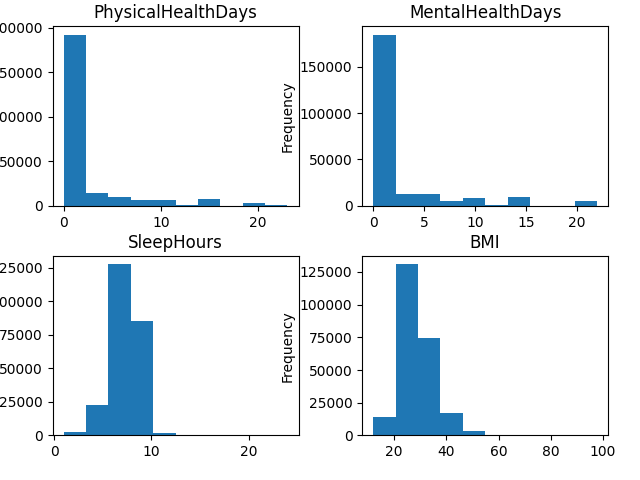

In [48]:
#take a look again to double check on the outliers
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI']
plot_hist(df=outlier_removed, features=features, n_rows=2, n_cols=2)
%matplot plt

The outliers from PhysicalHealthDays and MentalHealthDays has been changed to median values compare to the previous charts

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

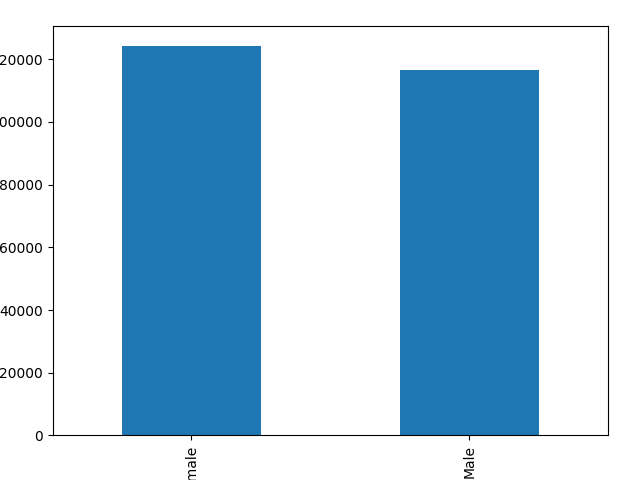

In [49]:
#recreating bar chart for categorical column, Sex
plt.clf()
sex = outlier_removed['Sex'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, Sex

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

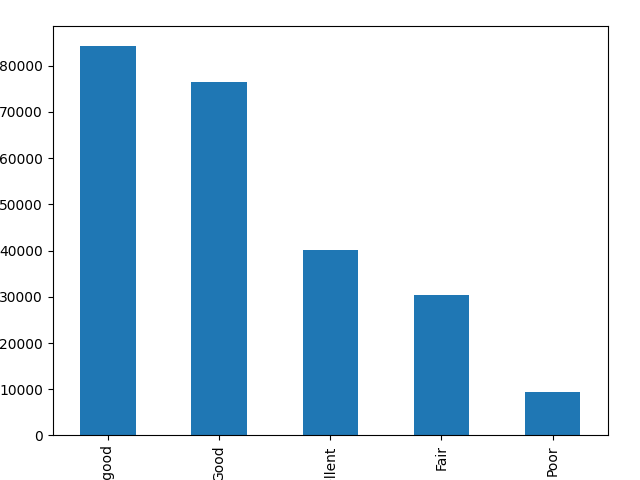

In [50]:
#recreating bar chart for categorical column, GeneralHealth
plt.clf()
GeneralHealth = outlier_removed['GeneralHealth'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, GeneralHealth

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

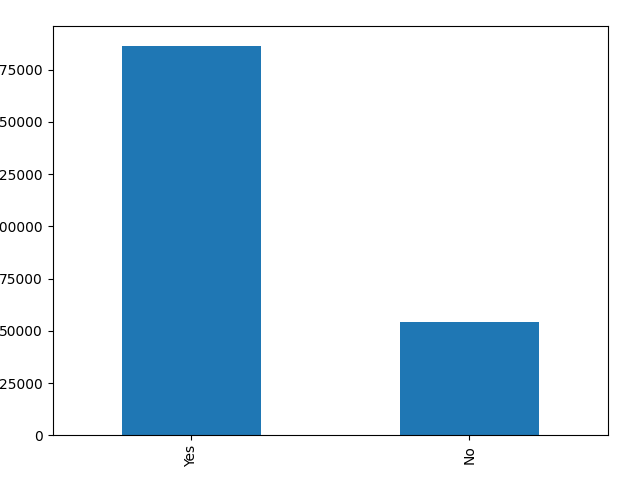

In [51]:
#recreating bar chart for categorical column, PhysicalActivities
plt.clf()
PhysicalActivities = outlier_removed['PhysicalActivities'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, PhysicalActivities

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

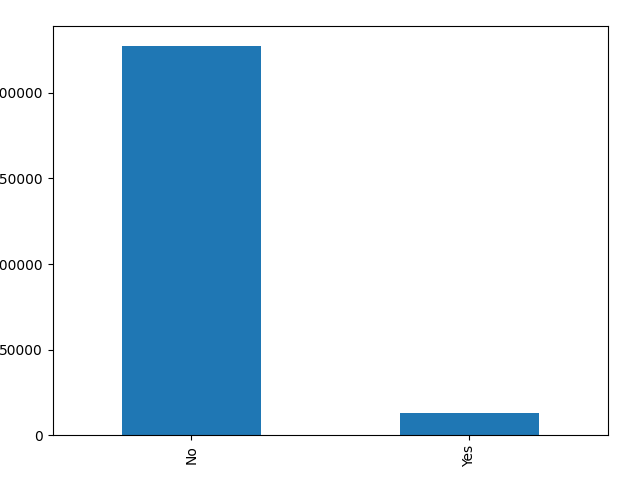

In [52]:
#recreating bar chart for categorical column, HadHeartAttack
plt.clf()
HadHeartAttack = outlier_removed['HadHeartAttack'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, HadHeartAttack

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

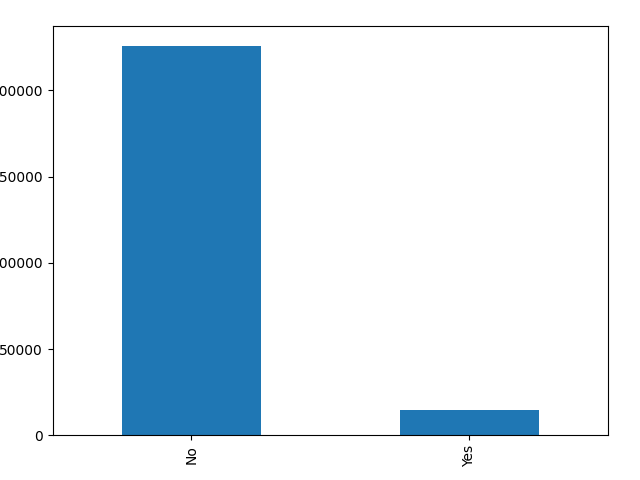

In [53]:
#recreating bar chart for categorical column, HadAngina
plt.clf()
HadAngina = outlier_removed['HadAngina'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, HadAngina

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

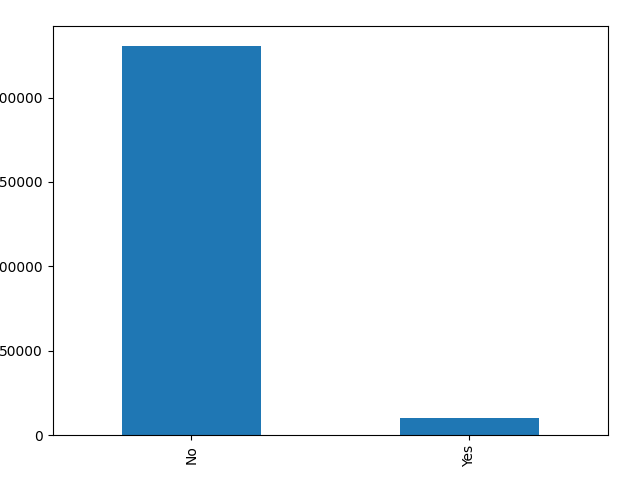

In [54]:
#recreating bar chart for categorical column, HadStroke
plt.clf()
HadStroke = outlier_removed['HadStroke'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, HadStroke

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

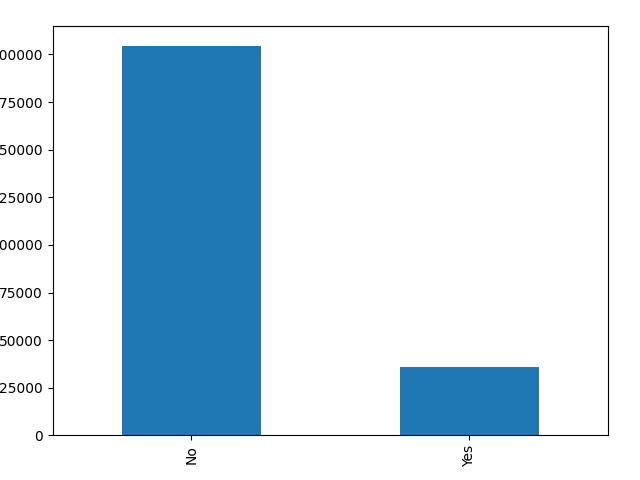

In [55]:
#recreating bar chart for categorical column, HadAsthma
plt.clf()
HadAsthma = outlier_removed['HadAsthma'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, HadAsthma

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

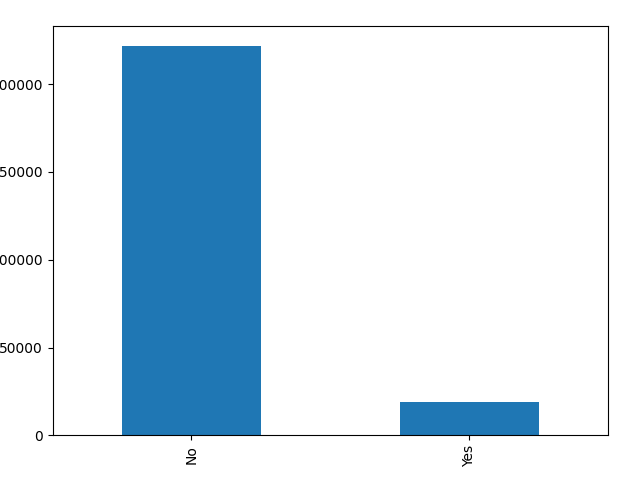

In [56]:
#recreating bar chart for categorical column, HadCOPD
plt.clf()
HadCOPD = outlier_removed['HadCOPD'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, HadCOPD

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

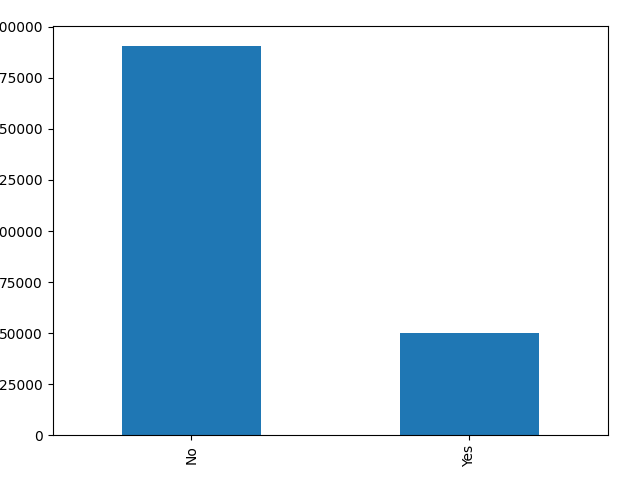

In [57]:
#recreating bar chart for categorical column, HadDepressiveDisorder
plt.clf()
HadDepressiveDisorder = outlier_removed['HadDepressiveDisorder'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, HadDepressiveDisorder

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

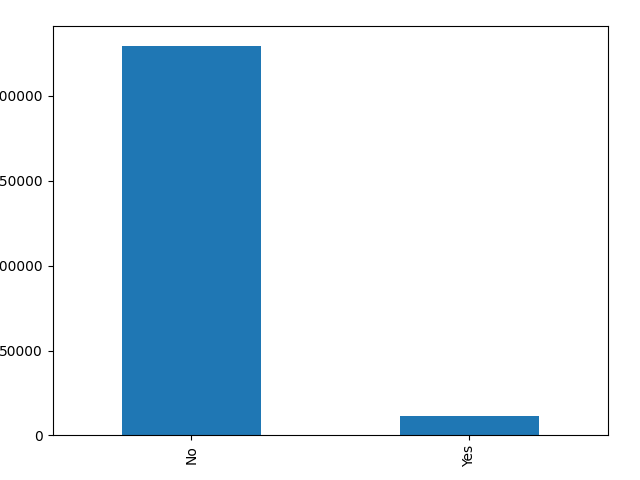

In [58]:
#recreating bar chart for categorical column, HadKidneyDisease
plt.clf()
HadKidneyDisease = outlier_removed['HadKidneyDisease'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, HadKidneyDisease

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

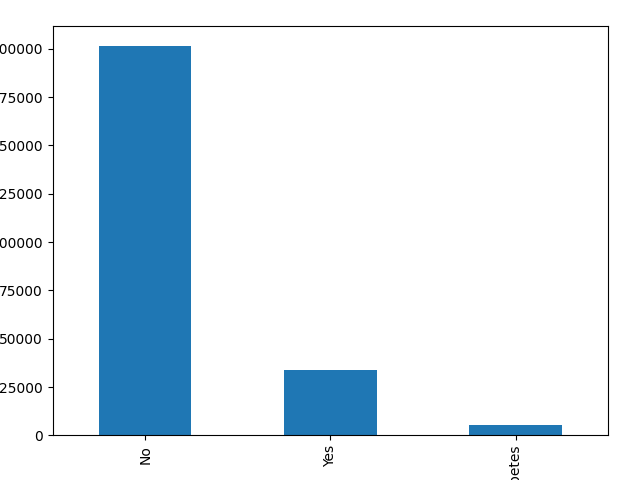

In [59]:
#recreating bar chart for categorical column, HadDiabetes
plt.clf()
HadDiabetes = outlier_removed['HadDiabetes'].value_counts().plot.bar()
%matplot plt

There are only 3 columns left indicate  that  the outlier has been deleted

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

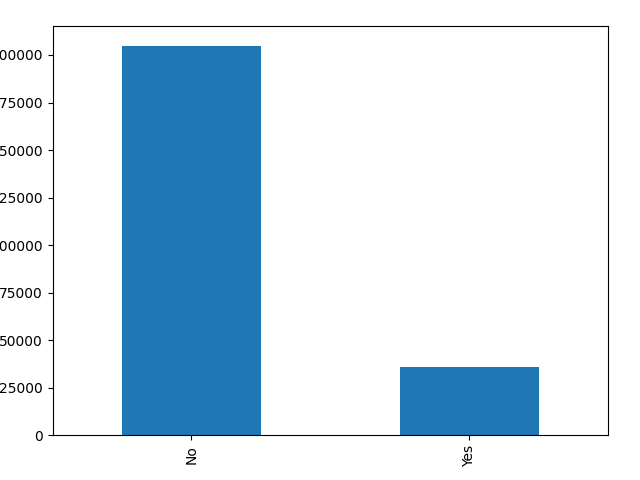

In [60]:
#recreating bar chart for categorical column, DifficultyWalking
plt.clf()
DifficultyWalking = outlier_removed['DifficultyWalking'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, DifficultyWalking

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

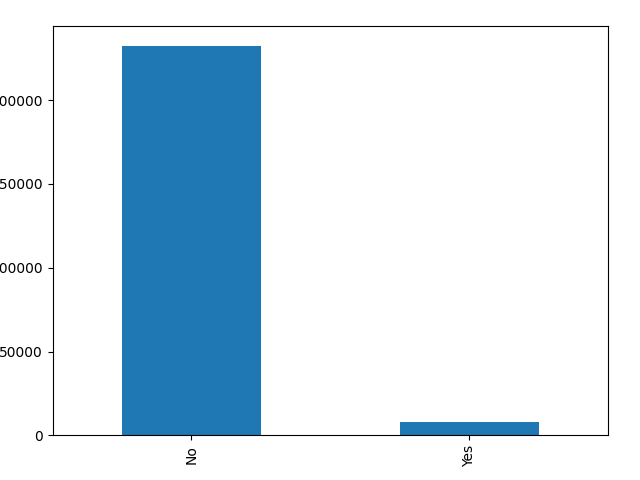

In [61]:
#recreating bar chart for categorical column, DifficultyDressingBathing
plt.clf()
DifficultyDressingBathing = outlier_removed['DifficultyDressingBathing'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, DifficultyDressingBathing

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

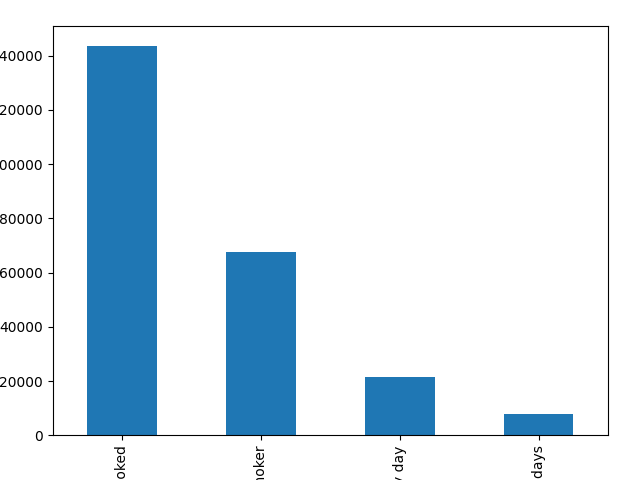

In [62]:
#recreating bar chart for categorical column, SmokerStatus
plt.clf()
SmokerStatus = outlier_removed['SmokerStatus'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, SmokerStatus

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

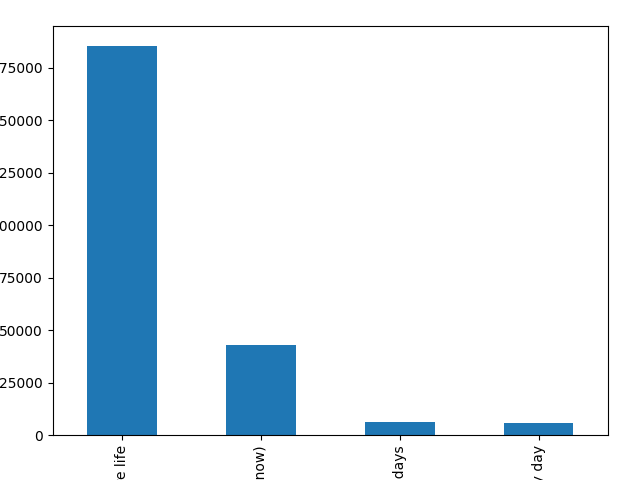

In [63]:
#recreating bar chart for categorical column, ECigaretteUsage
plt.clf()
ECigaretteUsage = outlier_removed['ECigaretteUsage'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, ECigaretteUsage

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

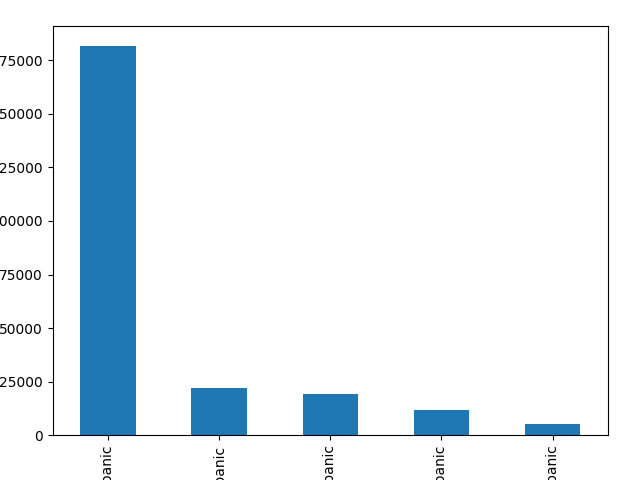

In [64]:
#recreating bar chart for categorical column, RaceEthnicityCategory
plt.clf()
RaceEthnicityCategory = outlier_removed['RaceEthnicityCategory'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, RaceEthnicityCategory

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

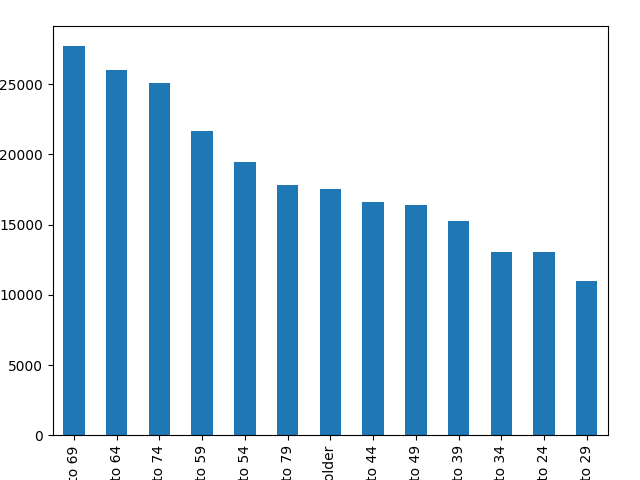

In [65]:
#recreating bar chart for categorical column, AgeCategory
plt.clf()
AgeCategory = outlier_removed['AgeCategory'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, AgeCategory

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

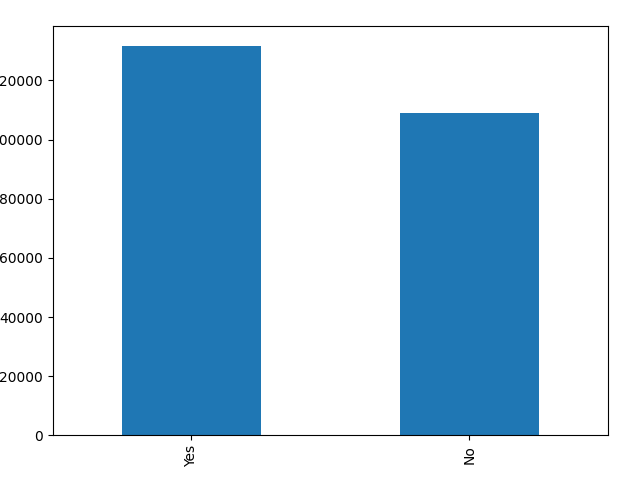

In [66]:
#recreating bar chart for categorical column, AlcoholDrinkers
plt.clf()
AlcoholDrinkers = outlier_removed['AlcoholDrinkers'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, AlcoholDrinkers

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

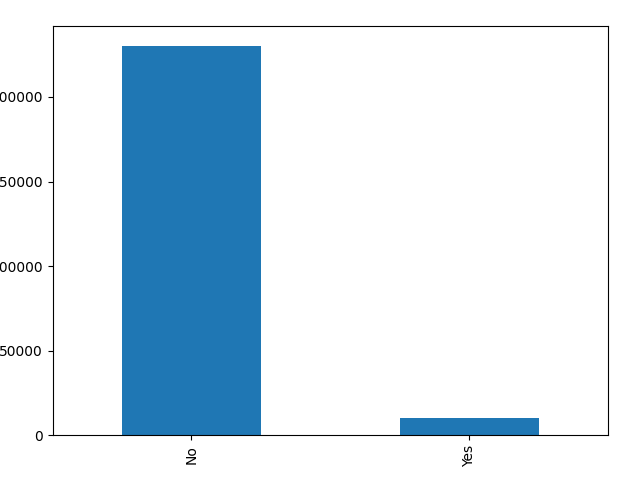

In [67]:
#recreating bar chart for categorical column, HighRiskLastYear
plt.clf()
HighRiskLastYear = outlier_removed['HighRiskLastYear'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, HighRiskLastYear

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

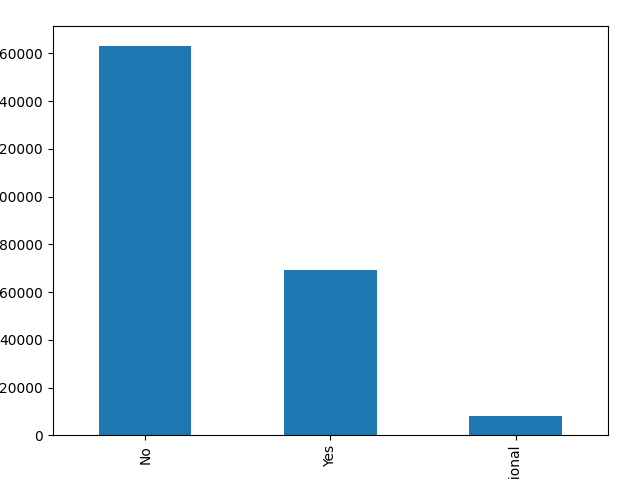

In [68]:
#recreating bar chart for categorical column, CovidPos
plt.clf()
CovidPos = outlier_removed['CovidPos'].value_counts().plot.bar()
%matplot plt

The results remained similar for categorical column, CovidPos

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

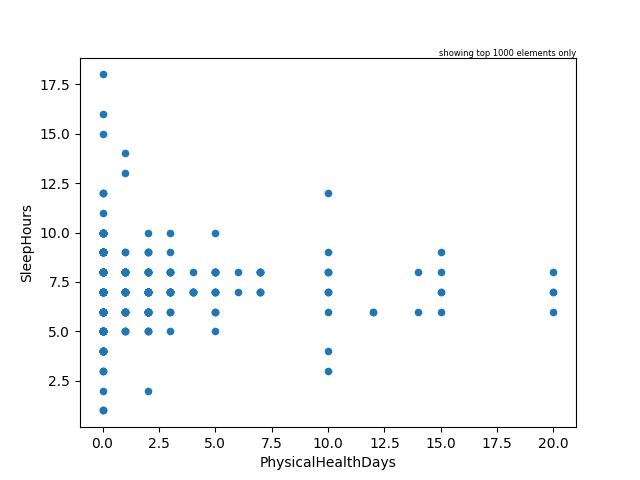

In [69]:
#recreating a scatter plot to compare MentalHealthDays and SleepHours
plt.clf()
outlier_removed.plot.scatter('PhysicalHealthDays', 'SleepHours')
%matplot plt

* Output: Scatter plot remains similar but is now outputting up until 20.0 for PhysicalHealthDays

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

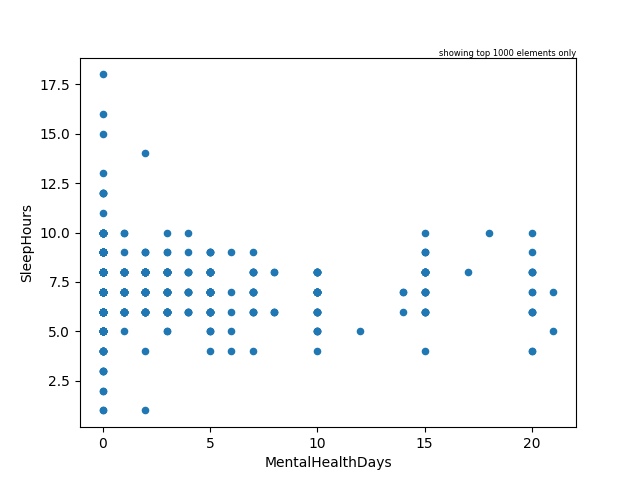

In [70]:
#recreating a scatter plot to compare MentalHealthDays and SleepHours
plt.clf()
outlier_removed.plot.scatter('MentalHealthDays', 'SleepHours')
%matplot plt

* Output: Scatter plot remains similar, slight variation with plots but is now outputting up until 20 for MentalHealthDays since the outlier has been proceessed

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

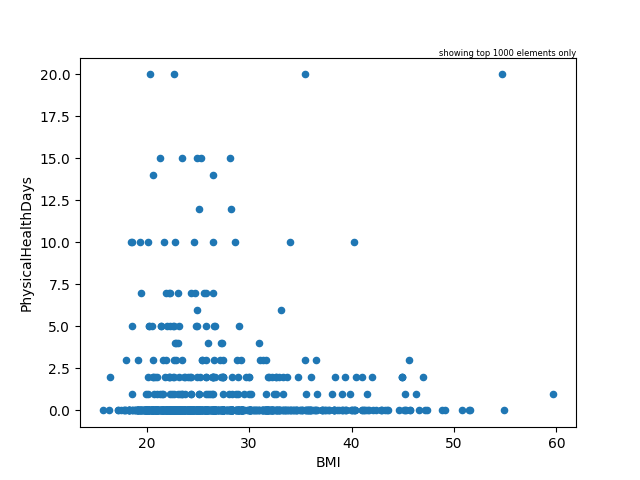

In [71]:
#recreating a scatter plot to compare BMI and PhysicalHealthDays
plt.clf()
outlier_removed.plot.scatter('BMI', 'PhysicalHealthDays')
%matplot plt

* Output: Scatter plot remains similar, but is now inputting up until 20.0 for PhysicalHealthDays since the outlier has been proceessed

# MILESTONE 3

## Data Transformation

### Examine Categorical variables and Numerical variables

In [72]:
# print out the categorical variables
categorical_columns = outlier_removed.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadDiabetes',
       'DifficultyWalking', 'DifficultyDressingBathing', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

There are a total of 20 categorical variables

In [73]:
# print out the numerical variables
numerical_columns = outlier_removed.select_dtypes(include=['int', 'float']).columns
print(numerical_columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI'], dtype='object')

There are 4 numerical variables

### Correlations and their interpretations

In [74]:
# create a dataframe for categorical columns only
categorical_df = outlier_removed[categorical_columns.tolist()].to_spark()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Exam the colleration on categorical variables using the Chi-square test**

In [75]:
# List of all column names excluding the target column
feature_columns = [col for col in categorical_df.columns if col != 'HadHeartAttack']

# Index all columns including the target
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_df.columns]

# Assemble indexed features into a single vector column
assembler = VectorAssembler(inputCols=[col + "_index" for col in feature_columns], outputCol="features")

# Define the pipeline with the stages
pipeline = Pipeline(stages=indexers + [assembler])

# Fit the pipeline
categorical_df_transformed = pipeline.fit(categorical_df).transform(categorical_df)

# Select the features vector and the target variable index for the Chi-square test
data_for_chi_sq_test = categorical_df_transformed.select("features", "HadHeartAttack_index")

# Apply the Chi-square test
chiSqResults = ChiSquareTest.test(data_for_chi_sq_test, "features", "HadHeartAttack_index").head()

# Print pValues and the test statistic
print("pValues: " + str(chiSqResults.pValues))
print("statistics: " + str(chiSqResults.statistics))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

pValues: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
statistics: [1305.8511488163085,9591.42626081514,1615.0091525786313,47794.5845148138,7516.548773132699,122.01842939151899,4224.038370072238,119.83300374453523,2838.099255685381,5158.503543023887,6070.177611777568,1629.7591613217846,2158.731624604394,122.04912608966364,213.37906528184877,7927.122520112351,1299.0995427282019,116.61217018208669,225.7350019340584]

**Exam the Chi-square result** <br>
The pValues let us know that there is'nt a linear connection of HadHeartAttack to other independant variables since all the values equal 0 <br>
Looking at the statistic, there are correlations of the dependent variables. Let examinate it further in the next code


In [76]:
# Print variable name alongside rounded statistic value
ind_spark = categorical_df.drop('HadHeartAttack')
for i in range(len(ind_spark.columns)):  # Ensure you reference the correct DataFrame's columns
    print(f"{ind_spark.columns[i]}: {round(chiSqResults.statistics[i], 2)}")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Sex: 1305.85
GeneralHealth: 9591.43
PhysicalActivities: 1615.01
HadAngina: 47794.58
HadStroke: 7516.55
HadAsthma: 122.02
HadCOPD: 4224.04
HadDepressiveDisorder: 119.83
HadKidneyDisease: 2838.1
HadDiabetes: 5158.5
DifficultyWalking: 6070.18
DifficultyDressingBathing: 1629.76
SmokerStatus: 2158.73
ECigaretteUsage: 122.05
RaceEthnicityCategory: 213.38
AgeCategory: 7927.12
AlcoholDrinkers: 1299.1
HighRiskLastYear: 116.61
CovidPos: 225.74

**Intepret the results** <br>
Sex (1305.85): This indicates that being male (encoded as 1) contributes positively to the likelihood of having a heart attack. The higher the coefficient, the stronger the positive association.<br>
GeneralHealth (9591.43): Higher values here indicate a strong positive association between poor general health and the likelihood of having a heart attack. This variable seems to have a significant impact.<br>
PhysicalActivities (1615.01): More physical activities show a negative association with the likelihood of having a heart attack. However, the coefficient is lower compared to 'GeneralHealth'.
HadAngina (47794.58): This has a very high coefficient, indicating a strong positive association between having angina and the likelihood of having a heart attack.<br>
HadStroke (7516.55): Similarly, having had a stroke shows a positive association with the likelihood of having a heart attack.<br>
HadAsthma (122.02): This variable has a lower coefficient, suggesting a weaker association compared to others.<br>
HadCOPD (4224.04): Having COPD (Chronic Obstructive Pulmonary Disease) also shows a positive association with the likelihood of having a heart attack.<br>
HadDepressiveDisorder (119.83): This variable has a lower coefficient, indicating a weaker association.<br>
HadKidneyDisease (2838.10): Having kidney disease shows a positive association with the likelihood of having a heart attack.<br>
HadDiabetes (5158.50): Diabetes also shows a positive association with the likelihood of having a heart attack.<br>
DifficultyWalking (6070.18): Difficulty walking is positively associated with the likelihood of having a heart attack.<br>
DifficultyDressingBathing (1629.76): Similar to difficulty walking, difficulty dressing/bathing is positively associated with the likelihood of having a heart attack.<br>
SmokerStatus (2158.73): Being a smoker is positively associated with the likelihood of having a heart attack.<br>
ECigaretteUsage (122.05): This variable has a lower coefficient, suggesting a weaker association compared to smoking status.<br>
RaceEthnicityCategory (213.38): This variable has a lower coefficient, suggesting a weaker association with the likelihood of having a heart attack.<br>
AgeCategory (7927.12): Age has a significant positive association with the likelihood of having a heart attack. This is a common finding in heart disease studies.<br>
AlcoholDrinkers (1299.10): Alcohol consumption shows a positive association with the likelihood of having a heart attack, although the coefficient is lower compared to other variables.<br>
HighRiskLastYear (116.61): Being at high risk in the previous year shows a positive association with the likelihood of having a heart attack, but the coefficient is relatively low.<br>
CovidPos (225.74): Testing positive for COVID-19 shows a positive association with the likelihood of having a heart attack, but again, the coefficient is relatively low.<br>

**Exam the colleration on numerical variables using the correlation matrix**

In [77]:
# we create a spark dataframe numerical_df to work on numerical variables
numerical_df  = outlier_removed[numerical_columns.tolist()].to_spark()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [78]:
# Apply VectorAssembler on numerical columns
assembler = VectorAssembler(inputCols=numerical_columns.tolist(), outputCol="features")
vector_df = assembler.transform(numerical_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [100]:
# Calculate the correlation matrix for the assembled features
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]

# Convert the correlation matrix to a dense format for easier viewing
dense_corr_matrix = correlation_matrix.toArray()

# Print the correlation matrix
for row in dense_corr_matrix:
    print(row)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[ 1.          0.16928244 -0.03472196  0.07272478]
[ 0.16928244  1.         -0.07274028  0.04934905]
[-0.03472196 -0.07274028  1.         -0.05329714]
[ 0.07272478  0.04934905 -0.05329714  1.        ]

**Interpretation** <br>
PhysicalHealthDays vs. MentalHealthDays: Moderate positive correlation (0.30). <br>
PhysicalHealthDays vs. SleepHours: Very weak negative correlation (-0.05). <br>
PhysicalHealthDays vs. BMI: Weak positive correlation (0.11). <br>
MentalHealthDays vs. SleepHours: Weak negative correlation (-0.13). <br>
MentalHealthDays vs. BMI: Very weak positive correlation (0.08). <br>
SleepHours vs. BMI: Very weak negative correlation (-0.05). <br>


## Transformation

### Manually convert the values of each variable <br>
We manually convert the values since there aren't a lot of categorical columns with more than 2 distinct values. Also, the categorical columns are both ordinal (mean it has a natural ordering) and norminal ( no inherent order among the categories). <br>
Therefore, manually adjusting the distinct values help better understanding the data of each variable. At the same time, we can asign the categorical values to classes that represent the ordinal variable since StringIndexer wont be able to make the order different on string values. <br>
As we manually convert those categorical variables, we won't need to create dummies.

In [80]:
# create af_spark dataframe from outlier spypark.pandas dataframe
df_spark = outlier_removed.to_spark()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [81]:
# In this step, we convert all the independant categprical into numerical values; "Yes" to 1 and "No" to 0 using a loop
columns_to_convert = ['PhysicalActivities','HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
                      'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'DifficultyWalking',
                      'DifficultyDressingBathing', 'AlcoholDrinkers', 'HighRiskLastYear']
for column in columns_to_convert:
    df_spark = df_spark.withColumn(column,
                                   F.when(F.col(column) == 'Yes', 1)
                                    .otherwise(0))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [82]:
# change Sex value to 1 and 0
df_spark = df_spark.withColumn('Sex', F.when(F.col('Sex') == 'Male', 1).otherwise(0))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [83]:
# Aplying the health mapping to the 'GeneralHealth' column
df_spark = df_spark.withColumn('GeneralHealth',
    F.when(F.col('GeneralHealth') == 'Fair', 0)
     .when(F.col('GeneralHealth') == 'Excellent', 1)
     .when(F.col('GeneralHealth') == 'Poor', 2)
     .when(F.col('GeneralHealth') == 'Good', 3)
     .otherwise(4))  # Assumes 'Very good' is the only other category


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [84]:
# Apply the mapping to the 'HadDiabetes' column using PySpark
df_spark = df_spark.withColumn('HadDiabetes',
    F.when(F.col('HadDiabetes') == 'Yes', 2)
     .when(F.col('HadDiabetes') == 'No, pre-diabetes or borderline diabetes', 0)
     .otherwise(0))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [85]:
# Apply the mapping to the 'SmokerStatus' column using PySpark
df_spark = df_spark.withColumn('SmokerStatus',
    F.when(F.col('SmokerStatus') == 'Never smoked', 0)
     .when(F.col('SmokerStatus') == 'Former smoker', 3)
     .when(F.col('SmokerStatus') == 'Current smoker - now smokes some days', 1)
     .when(F.col('SmokerStatus') == 'Current smoker - now smokes every day', 2)
     .otherwise(None))  # Handle any unexpected values by setting them to None (or you could choose another default)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [86]:
# Apply the mapping to the 'ECigaretteUsage' column using PySpark
df_spark = df_spark.withColumn('ECigaretteUsage',
    F.when(F.col('ECigaretteUsage') == 'Never used e-cigarettes in my entire life', 0)
     .when(F.col('ECigaretteUsage') == 'Not at all (right now)', 1)
     .when(F.col('ECigaretteUsage') == 'Use them some days', 2)
     .otherwise(3))  # Assumes 'Use them every day' is the remaining category


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [87]:
# Apply the mapping to the 'RaceEthnicityCategory' column using PySpark
df_spark = df_spark.withColumn('RaceEthnicityCategory',
    F.when(F.col('RaceEthnicityCategory') == 'White only, Non-Hispanic', 0)
     .when(F.col('RaceEthnicityCategory') == 'Black only, Non-Hispanic', 1)
     .when(F.col('RaceEthnicityCategory') == 'Other race only, Non-Hispanic', 2)
     .when(F.col('RaceEthnicityCategory') == 'Multiracial, Non-Hispanic', 3)
     .otherwise(4))  # Assumes 'Hispanic' is the remaining category


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [88]:
# Apply the mapping to the 'AgeCategory' column using PySpark
df_spark = df_spark.withColumn('AgeCategory',
    F.when(F.col('AgeCategory') == 'Age 18 to 24', 0)
     .when(F.col('AgeCategory') == 'Age 25 to 29', 1)
     .when(F.col('AgeCategory') == 'Age 30 to 34', 2)
     .when(F.col('AgeCategory') == 'Age 35 to 39', 3)
     .when(F.col('AgeCategory') == 'Age 40 to 44', 4)
     .when(F.col('AgeCategory') == 'Age 45 to 49', 5)
     .when(F.col('AgeCategory') == 'Age 50 to 54', 6)
     .when(F.col('AgeCategory') == 'Age 55 to 59', 7)
     .when(F.col('AgeCategory') == 'Age 60 to 64', 8)
     .when(F.col('AgeCategory') == 'Age 65 to 69', 9)
     .when(F.col('AgeCategory') == 'Age 70 to 74', 10)
     .when(F.col('AgeCategory') == 'Age 75 to 79', 11)
     .otherwise(12))  # Assumes 'Age 80 or older' is the remaining category


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [89]:
# Apply the mapping to the 'CovidPos' column using PySpark
df_spark = df_spark.withColumn('CovidPos',
    F.when(F.col('CovidPos') == 'Tested positive using home test without a health professional', 1)
     .when(F.col('CovidPos') == 'Yes', 1)
     .otherwise(0))  # Maps 'No' and any other values to 0


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [90]:
# We have the df_spark dataframe that contain all the independant categorical transfered to numerical values
df_spark.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-------------+------------------+----------------+------------------+----------+--------------+---------+---------+---------+-------+---------------------+----------------+-----------+-----------------+-------------------------+------------+---------------+---------------------+-----------+-----+---------------+----------------+--------+
|Sex|GeneralHealth|PhysicalHealthDays|MentalHealthDays|PhysicalActivities|SleepHours|HadHeartAttack|HadAngina|HadStroke|HadAsthma|HadCOPD|HadDepressiveDisorder|HadKidneyDisease|HadDiabetes|DifficultyWalking|DifficultyDressingBathing|SmokerStatus|ECigaretteUsage|RaceEthnicityCategory|AgeCategory|  BMI|AlcoholDrinkers|HighRiskLastYear|CovidPos|
+---+-------------+------------------+----------------+------------------+----------+--------------+---------+---------+---------+-------+---------------------+----------------+-----------+-----------------+-------------------------+------------+---------------+---------------------+-----------+-----+--------

Take a look at the pyspark dataframe, we see all categorical values has been converted to numerical values


**Scalling the numerical variable**


In [91]:
# We will scale the numerical variable, we turn the 4 columns into a vector then apply the StandardScaler
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.sql.functions import col
assembler = VectorAssembler(
    inputCols=['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours'],
    outputCol='features'
)

df_transformed = assembler.transform(df_spark)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [92]:
# Apply StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
scaler_model = scaler.fit(df_transformed)
df_scaled = scaler_model.transform(df_transformed)
df_scaled.select('scaledFeatures').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|scaledFeatures                                |
+----------------------------------------------+
|[4.202198602565349,0.0,0.0,3.454399417057867] |
|[3.8594118265367108,0.0,0.0,3.454399417057867]|
|[5.516724676710881,0.0,0.0,4.14527930046944]  |
|[4.203728900672619,0.0,0.0,4.14527930046944]  |
|[3.778306026851364,0.0,0.0,4.14527930046944]  |
|[3.218216919590287,0.0,0.0,4.14527930046944]  |
|[3.7232152949896182,0.0,0.0,4.14527930046944] |
|[6.577221265049478,0.0,0.0,4.14527930046944]  |
|[3.9665326940456604,0.0,0.0,4.14527930046944] |
|[3.1371111199049397,0.0,0.0,4.14527930046944] |
|[3.152414100977647,0.0,0.0,4.836159183881014] |
|[3.3268680852065065,0.0,0.0,4.836159183881014]|
|[3.4906099826844716,0.0,0.0,4.836159183881014]|
|[4.743924132539177,0.0,0.0,4.836159183881014] |
|[3.860942124643982,0.0,0.0,4.836159183881014] |
|[4.9260296073043905,0.0,0.0,4.836159183881014]|
|[5.928374867566701,0.0,0.0,4.836159183881014] |
|[4.743924132539177,

We have a Vectorize of the numerical variable.Each row of the vector contains 4 values represent for each numerical variable

In [93]:
# Drop the unnecessary columns and only leave the independent categorical columns along with scaled numerical columns
df_final = df_scaled.drop('BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'features')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [94]:
# here is the list of final columns where only converted categorical and scalled numerical columns.
df_final.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadDiabetes', 'DifficultyWalking', 'DifficultyDressingBathing', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HighRiskLastYear', 'CovidPos', 'scaledFeatures']

Examine the columns, there only remain the categorical variable and the scaledFeatures represent the scaled numerical columns

## Modeling

**Logistic Regression**

In [96]:
# Split into training and testing with 70% training and 30% testing
train_data, test_data = df_final.randomSplit([0.7, 0.3], seed=42)

# In this step we will combine all independant variables into a single vector
assembler = VectorAssembler(
    inputCols=[x for x in df_final.columns if x != 'HadHeartAttack'],
    outputCol='features'
)
# Apply UnivariateFeatureSelector to select top 10 predictors
selector = UnivariateFeatureSelector(
    featuresCol='features', 
    outputCol='selectedFeatures',
    labelCol='HadHeartAttack', 
    selectionMode='numTopFeatures'
).setFeatureType("continuous").setLabelType("categorical").setSelectionThreshold(10)

# Apply the logistic regression model
log_reg = LogisticRegression(
    labelCol='HadHeartAttack', 
    featuresCol='selectedFeatures'
)

#  Create the pipeline
pipeline_lr = Pipeline(stages=[assembler, selector, log_reg])

# Apply parameter grid for logistic regression for model fine-tuning
paramGrid_lr = ParamGridBuilder() \
    .addGrid(log_reg.regParam, [0.01, 0.1, 0.5]) \
    .addGrid(log_reg.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# create evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol='HadHeartAttack', 
    metricName='f1'
)

# Apply crossValidator to avoid overfitting
crossval_lr = CrossValidator(
    estimator=pipeline_lr, 
    estimatorParamMaps=paramGrid_lr,
    evaluator=evaluator, 
    numFolds=3
)

# apply cross validation on the training data
cvModel_lr = crossval_lr.fit(train_data)
predictions_lr = cvModel_lr.transform(test_data)

# Print evaluation results for logistic regression model
print("Logistic Regression Evaluations:")
print("F1 Score: {:.2f}".format(evaluator.evaluate(predictions_lr, {evaluator.metricName: 'f1'})))
print("Weighted Precision: {:.2f}".format(evaluator.evaluate(predictions_lr, {evaluator.metricName: 'weightedPrecision'})))
print("Weighted Recall: {:.2f}".format(evaluator.evaluate(predictions_lr, {evaluator.metricName: 'weightedRecall'})))
print("Accuracy: {:.2f}".format(evaluator.evaluate(predictions_lr, {evaluator.metricName: 'accuracy'})))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-96:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in cell_monitor
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in <listcomp>
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
KeyError: 'jobGroup'


Logistic Regression Evaluations:
F1 Score: 0.93
Weighted Precision: 0.93
Weighted Recall: 0.95
Accuracy: 0.95

F1 Score: A measure of accuracy in identifying positive cases (heart attacks) while avoiding false positives. A score of 0.93 suggests the model accurately predicts heart attacks and minimizes false alarms.
<br>
Weighted Precision: Reflects the accuracy of positive predictions, considering any imbalance in the data. A value of 0.93 indicates a high proportion of correct predictions for heart attacks across all cases.
<br>
Weighted Recall: Measures how well the model captures actual heart attack instances, considering data imbalances. A value of 0.95 suggests the model effectively identifies most true heart attack cases.
<br>
Accuracy: Indicates the overall correctness of the model's predictions. A value of 0.95 means the model accurately predicts heart attacks in 95% of cases.

**Random Forest**

In [98]:
# Split into training and testing with 70% training and 30% testing
train_data, test_data = df_final.randomSplit([0.7, 0.3], seed=42)

# In this step we, again, we will combine all independant variables into a single vector
assembler = VectorAssembler(
    inputCols=[x for x in df_final.columns if x != 'HadHeartAttack'],
    outputCol='features'
)
selector = UnivariateFeatureSelector(
    featuresCol='features', outputCol='selectedFeatures',
    labelCol='HadHeartAttack', selectionMode='numTopFeatures'
).setFeatureType("continuous").setLabelType("categorical").setSelectionThreshold(10)

# Apply random forest model
rand_forest = RandomForestClassifier(
    labelCol='HadHeartAttack', featuresCol='selectedFeatures'
)

# Create pipeline
pipeline_rf = Pipeline(stages=[assembler, selector, rand_forest])

# Apply parameter grid for random forest for model fine-tuning
paramGrid_rf = ParamGridBuilder() \
    .addGrid(rand_forest.numTrees, [5, 10, 20]) \
    .addGrid(rand_forest.maxDepth, [5, 10, 15]) \
    .build()

# Evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol='HadHeartAttack', metricName='f1'
)

# Apply crossValidator to avoid overfitting
crossval_rf = CrossValidator(
    estimator=pipeline_rf, estimatorParamMaps=paramGrid_rf,
    evaluator=evaluator, numFolds=3
)

# apply cross validation on the training data
cvModel_rf = crossval_rf.fit(train_data)
predictions_rf = cvModel_rf.transform(test_data)

# Print evaluation results for random forest
print("Random Forest Evaluations:")
print("F1 Score: {:.2f}".format(evaluator.evaluate(predictions_rf, {evaluator.metricName: 'f1'})))
print("Weighted Precision: {:.2f}".format(evaluator.evaluate(predictions_rf, {evaluator.metricName: 'weightedPrecision'})))
print("Weighted Recall: {:.2f}".format(evaluator.evaluate(predictions_rf, {evaluator.metricName: 'weightedRecall'})))
print("Accuracy: {:.2f}".format(evaluator.evaluate(predictions_rf, {evaluator.metricName: 'accuracy'})))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-98:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in cell_monitor
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in <listcomp>
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
KeyError: 'jobGroup'


Random Forest Evaluations:
F1 Score: 0.93
Weighted Precision: 0.93
Weighted Recall: 0.95
Accuracy: 0.95

We use same seed,feature selector, and data split for Decison Tree to compare it's metric to Logistic Regression method. <br>
We have a similiar output to the Logistic regression model. Therefore, we have similiar intepretation on the result.